## EDA (Exploratory Data Analysis) on Mall Customers dataset

1.Load the datasets

2.Clean data(missing values,duplicates,types)

3.Treat Outliers.

4.Univariate,Bivariate and multivariate analysis

5.Insights 

### Outlier: A data point that is significantly different from other observations in a dataset.

### How outliers will come---?

1.Measurement errors

2.Data entry mistakes

### Why they are important---?

1.They can be errors

2.They effect the data analysis

### How to identify the outliers---?

1.Statiscal methods

---->Interquartile Range(IQR)

---->Z-score

2.Visualization techniques

---->Box Plots

---->Scatter plots

---->Histograms


### Univariate analysis - a method that analyzes a single variable to describe its characteristics,finding patterns and summarize data.
####  It involves only one variable.

### Bivariate analysis - it will give the relationship between 2 variables.It helps to find if there is an correlation ,association or any connection between the 2 variables
#### It involves 2 variables(x & y)

### Multivariate analysis- to understand how multiple factors interact and influence each other.
#### It involves more than 2 variables
Example -
How our age,income and education level together influence the purchasing behaviour.





### ETL (Extract Transform Load)

### ELT

## EDA: <Dataset>

1. Load  & overview 

2. Cleaning(missing,dupes,dtypes)

3. Uni,Bi & Multi analysis

4. Outlier - IQR 

5. Feature Engineering

6. Key Insights

### Feature Engineering - "Feature Engineering is the process of turning raw data into useful features" that helps to improve the performance of machine learning models.

In [1]:
# 1.Load libraries & Dataset
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# 2. Basic Information & Overview
print("Shape of the dataset:",df.shape)
print("\nData Info:\n")
df.info()

# Summary Statistics
df.describe(include='all')

Shape of the dataset: (200, 5)

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [5]:
# 3. Missing Values Analysis
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum() / len(df)) * 100
})

missing = missing.sort_values(by='missing_percent', ascending=False)
print(missing)


                        missing_count  missing_percent
CustomerID                          0              0.0
Genre                               0              0.0
Age                                 0              0.0
Annual Income (k$)                  0              0.0
Spending Score (1-100)              0              0.0


In [6]:
# 4. Handling Missing Values (Mall Customers)
# No missing values in this dataset
print("Missing values in the dataset:\n", df.isnull().sum())

# Total missing values
print("Total missing values:", df.isnull().sum().sum())


Missing values in the dataset:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Total missing values: 0


In [7]:
# 3.Missing values analysis after cleaning
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})
missing.sort_values(by='missing_percent',ascending=False)

,missing_count,missing_percent
CustomerID,0,0.0
Genre,0,0.0
Age,0,0.0
Annual Income (k$),0,0.0
Spending Score (1-100),0,0.0


#### Insight: The dataset has no missing values, so all information is retained and ready for analysis.

In [8]:
# 5. Duplicates & Data type check

# Check duplicate rows
print("Duplicate rows:", df.duplicated().sum())

# Convert 'Genre' to categorical type
df['Genre'] = df['Genre'].astype('category')

# Display data types
print("\nData types after conversion:\n", df.dtypes)


Duplicate rows: 0

Data types after conversion:
 CustomerID                   int64
Genre                     category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              200 non-null    int64   
 1   Genre                   200 non-null    category
 2   Age                     200 non-null    int64   
 3   Annual Income (k$)      200 non-null    int64   
 4   Spending Score (1-100)  200 non-null    int64   
dtypes: category(1), int64(4)
memory usage: 6.7 KB


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


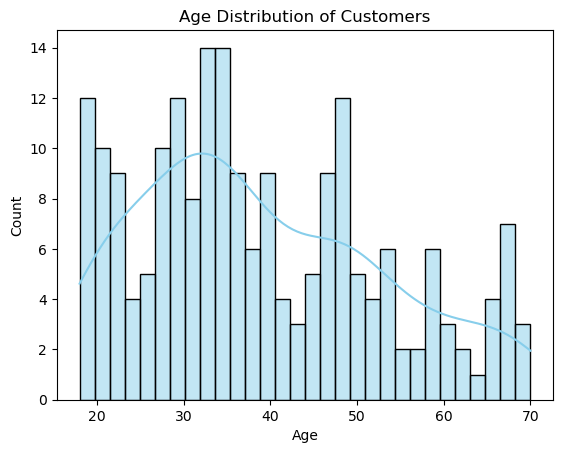

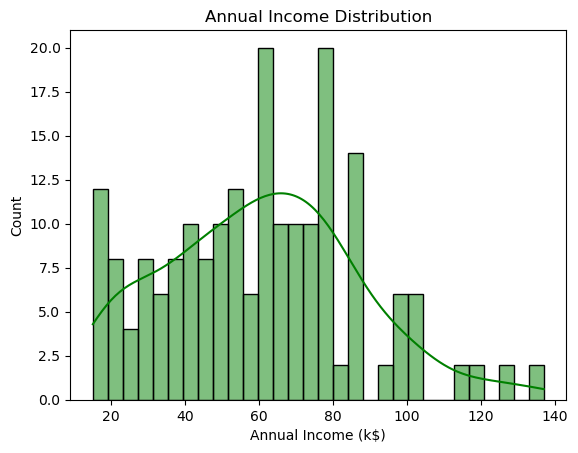

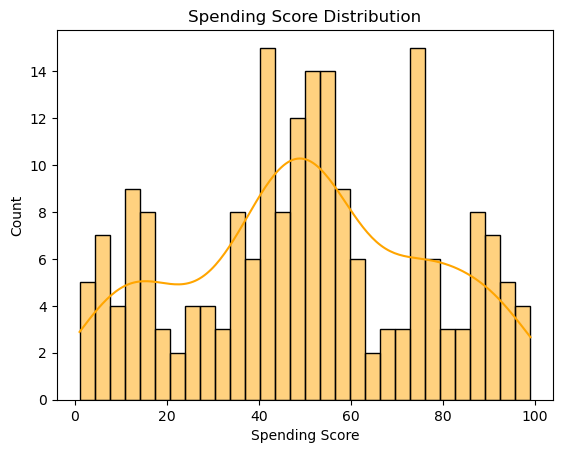

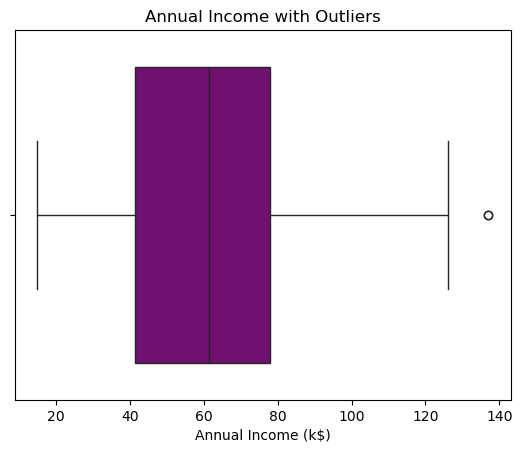

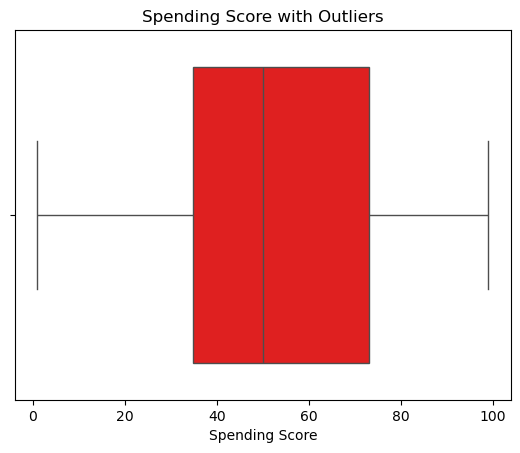

In [10]:
# 6. Univariate Analysis - Numerical Features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(df[num_cols].describe())

# Histogram: Age
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Histogram: Annual Income
sns.histplot(df['Annual Income (k$)'], bins=30, kde=True, color='green')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()

# Histogram: Spending Score
sns.histplot(df['Spending Score (1-100)'], bins=30, kde=True, color='orange')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show()

# Boxplot: Annual Income
sns.boxplot(x=df['Annual Income (k$)'], color='purple')
plt.title('Annual Income with Outliers')
plt.xlabel('Annual Income (k$)')
plt.show()

# Boxplot: Spending Score
sns.boxplot(x=df['Spending Score (1-100)'], color='red')
plt.title('Spending Score with Outliers')
plt.xlabel('Spending Score')
plt.show()


C:\Users\aksha\AppData\Local\Temp\ipykernel_28456\428952688.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


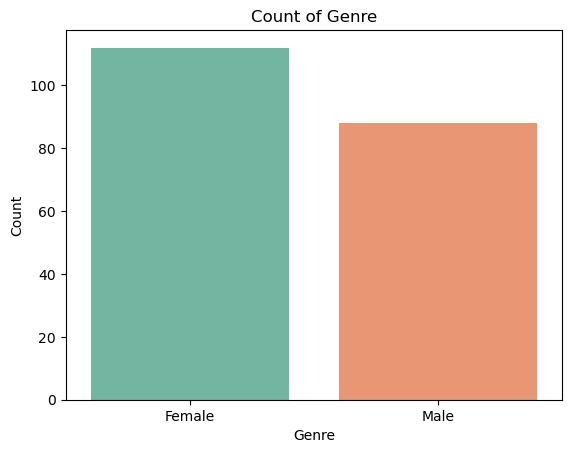

In [11]:
# 7. Univariate Analysis - Categorical Features
cat_cols = df.select_dtypes('category').columns

for col in cat_cols:
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


C:\Users\aksha\AppData\Local\Temp\ipykernel_28456\3377576133.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Age', data=df, palette='Set3')


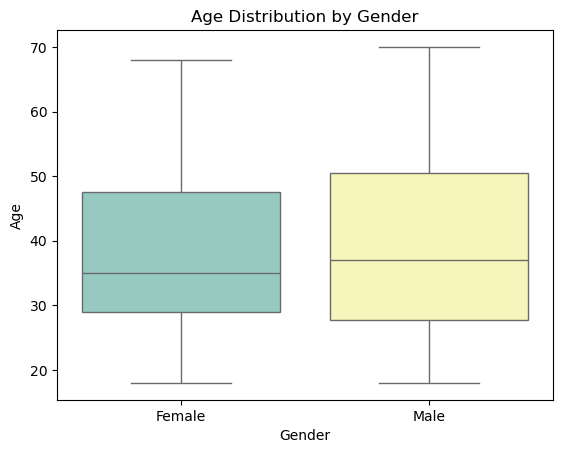

C:\Users\aksha\AppData\Local\Temp\ipykernel_28456\3377576133.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Annual Income (k$)', data=df, palette='Set2')


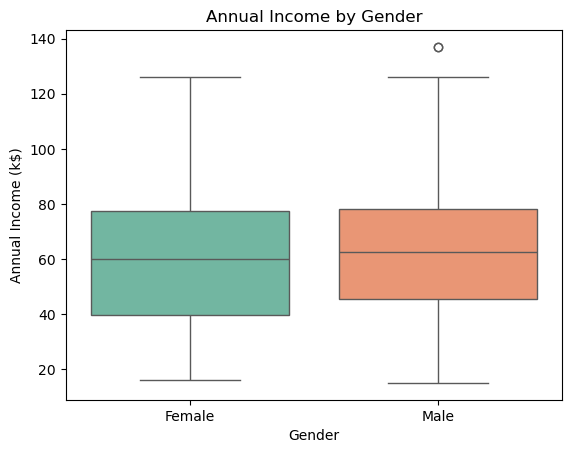

C:\Users\aksha\AppData\Local\Temp\ipykernel_28456\3377576133.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Spending Score (1-100)', data=df, palette='Set1')


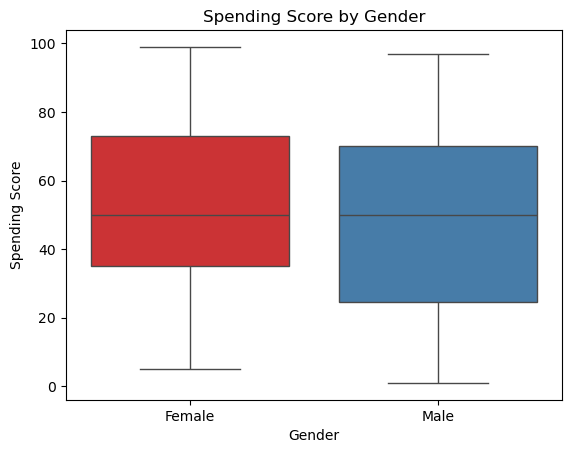

In [12]:
# 8. Bivariate Analysis - Numerical vs Categorical

# Age by Gender
sns.boxplot(x='Genre', y='Age', data=df, palette='Set3')
plt.title("Age Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()

# Annual Income by Gender
sns.boxplot(x='Genre', y='Annual Income (k$)', data=df, palette='Set2')
plt.title("Annual Income by Gender")
plt.xlabel("Gender")
plt.ylabel("Annual Income (k$)")
plt.show()

# Spending Score by Gender
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=df, palette='Set1')
plt.title("Spending Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Spending Score")
plt.show()


C:\Users\aksha\AppData\Local\Temp\ipykernel_28456\317865883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=df, palette='Set2')


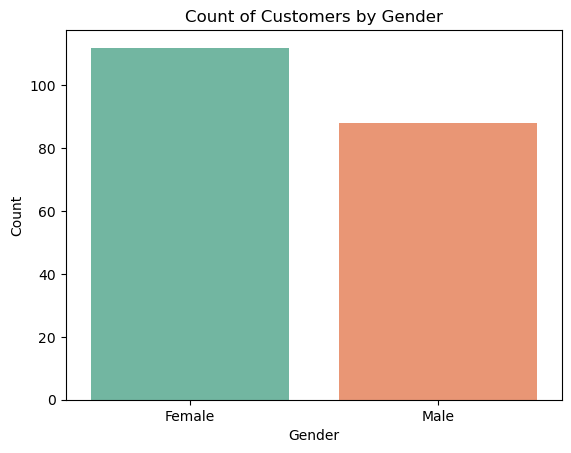

In [13]:
# 9. Categorical vs Categorical Analysis (Gender counts)
sns.countplot(x='Genre', data=df, palette='Set2')
plt.title("Count of Customers by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


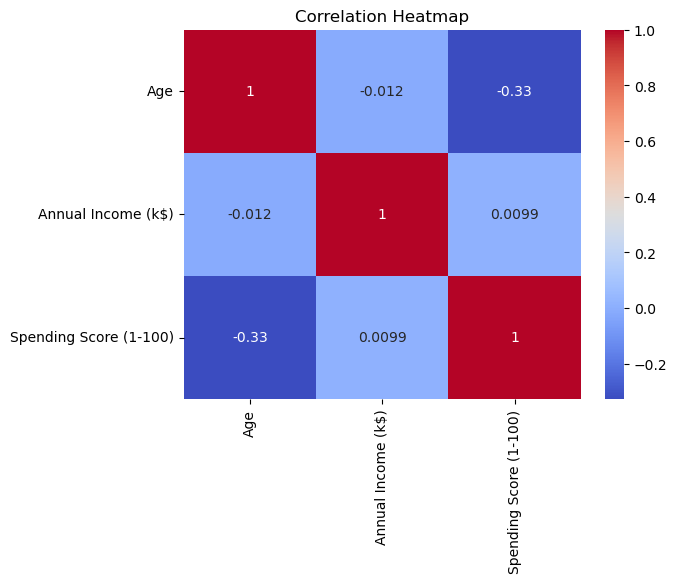

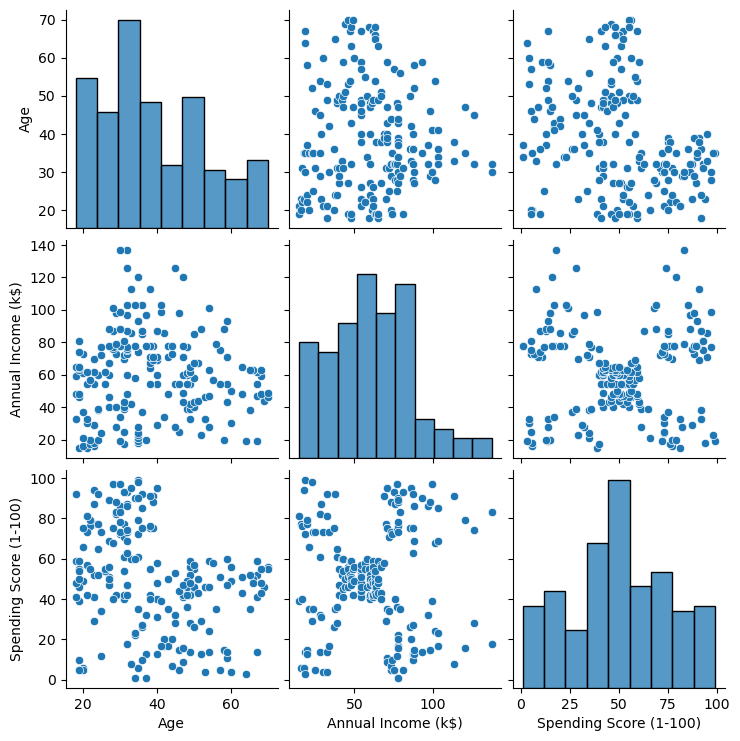

In [14]:
# 10. Correlation and Multivariate Analysis

# Correlation heatmap
corr = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()


### Insights: 

1.Annual Income and Spending Score may show a slight positive correlation, meaning customers with higher income tend to have higher spending scores.

2.Age shows little to no correlation with Spending Score or Annual Income in this dataset.

Number of outliers in Annual Income: 2


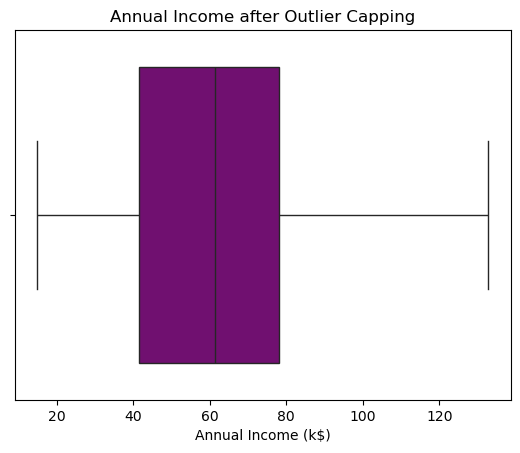

In [15]:
# 11. Outlier Detection using IQR for Annual Income
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['Annual Income (k$)'] < lower) | (df['Annual Income (k$)'] > upper)]
print("Number of outliers in Annual Income:", len(outliers))

# Capping outliers
df['Annual_Income_capped'] = df['Annual Income (k$)'].clip(lower, upper)

# Boxplot after capping
sns.boxplot(x=df['Annual_Income_capped'], color='purple')
plt.title('Annual Income after Outlier Capping')
plt.xlabel('Annual Income (k$)')
plt.show()


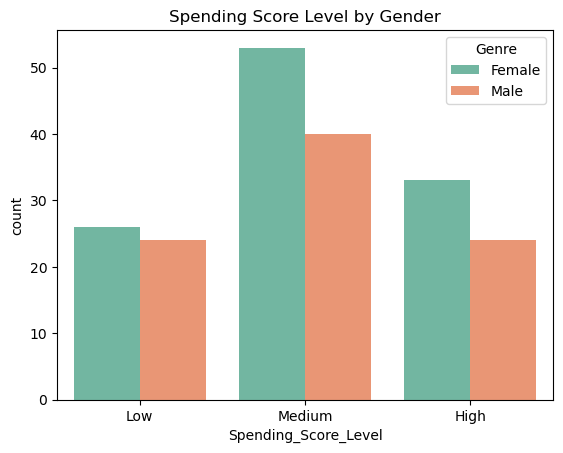

,Age,Age_Group,Annual Income (k$),Income_Level,Spending Score (1-100),Spending_Score_Level
0,19,18-25,15,Low,39,Medium
1,21,18-25,15,Low,81,High
2,20,18-25,16,Low,6,Low
3,23,18-25,16,Low,77,High
4,31,26-35,17,Low,40,Medium


In [16]:
# 12. Feature Engineering

# Age Group
bins = [17, 25, 35, 45, 55, 65, 75]
labels = ['18-25','26-35','36-45','46-55','56-65','66-75']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Income Level
income_bins = [0, 40, 70, 140]
income_labels = ['Low','Medium','High']
df['Income_Level'] = pd.cut(df['Annual Income (k$)'], bins=income_bins, labels=income_labels)

# Spending Score Level
score_bins = [0, 34, 67, 100]
score_labels = ['Low','Medium','High']
df['Spending_Score_Level'] = pd.cut(df['Spending Score (1-100)'], bins=score_bins, labels=score_labels)

# Visualize Spending Score Level by Genre
sns.countplot(x='Spending_Score_Level', hue='Genre', data=df, palette='Set2')
plt.title("Spending Score Level by Gender")
plt.show()

df[['Age','Age_Group','Annual Income (k$)','Income_Level','Spending Score (1-100)','Spending_Score_Level']].head()


In [17]:
# Export the cleaned Mall Customers data
df.to_csv("mall_customers_cleaned.csv", index=False)
print("\nCleaned Mall Customers data saved as mall_customers_cleaned.csv")



Cleaned Mall Customers data saved as mall_customers_cleaned.csv


In [18]:
import os
print(os.getcwd())

c:\Users\aksha\Desktop\AI&DS TRAINING\Data Analysis\EDA on 5 datasets
